In [396]:
import numpy as np
from collections import deque
import random
import networkx as nx
import matplotlib.pyplot as plt

In [397]:
class NetworkProcessor6:
    def __init__(self):
      self.lines_list = [] #line ,a b,d c
      #
      self.edges = [] # Split \n, \t
      self.nodes = []
      #
      self.network_array = []
      self.undirected_network_array = []
      #
      self.final_path_BFS = []
      self.formatted_paths = []
      #
      self.last_element = []
      self.formatted_paths_BFS_modified = []

    def read_file(self, file_path):
      with open(file_path, 'r') as file:
        line = file.readline()
        while line:
          self.lines_list.append(line)
          line = file.readline()

    def get_edges(self):
      edge = [item.strip('\n') for item in self.lines_list]
      self.edges = [item.split('\t') for item in edge]

    def get_unique_nodes(self):
      all_nodes = [item for sublist in self.edges for item in sublist]
      unique_nodes = list(set(all_nodes))
      self.nodes = sorted(unique_nodes)

    def get_network_array(self):
      self.network_array = np.zeros((len(self.nodes), len(self.nodes)), dtype=int)
      for start_node, end_node in self.edges:
        row = self.nodes.index(start_node)
        col = self.nodes.index(end_node)
        self.network_array[row, col] = 1

    def get_undirected_network_array(self):
      self.undirected_network_array = np.maximum(self.network_array, self.network_array.T)#改成無相圖

    def get_BFS_tree(self,start_node):
      nodes = len(self.undirected_network_array)
      visited = [False] * nodes
      start_node = self.nodes.index(start_node)
      queue = [(start_node, [self.nodes[start_node]])]
      #queue = [(start_node, [start_node])]
      visited[start_node] = True
      final_path_BFS = []
      while queue:
        current_node, path = queue.pop(0)
        random_neighbors = random.sample(range(nodes), nodes)
        for neighbor in random_neighbors:
          if self.undirected_network_array[current_node][neighbor] == 1 and not visited[neighbor]:
            visited[neighbor] = True
            queue.append((neighbor, path + [self.nodes[neighbor]]))
        self.final_path_BFS.append(path)

    def get_path_type_transform(self): #限定上面那種type
      for path in self.final_path_BFS:
        if len(path) > 1:
          for n in range(len(path)-1):
            self.formatted_paths.append((path[n], path[n+1]))
      self.formatted_paths = sorted(set(self.formatted_paths))

    def get_network_X_plot(self):
      G = nx.Graph()
      G.add_nodes_from(self.nodes)
      G.add_edges_from(self.formatted_paths)
      pos = nx.spring_layout(G)
      nx.draw(G, pos, with_labels=True, node_size=500, node_color='skyblue', font_size=12, font_color='black', font_weight='bold')
      plt.show()

    def find_the_end(self, start_node):
      paths_starting_with_node = [path for path in network.final_path_BFS if path[0] == start_node]
      longest_list = max(paths_starting_with_node, key=len)
      self.last_element = longest_list[-1]

    def change_start_end (self, start):
      self.formatted_paths_BFS_modified = []
      for node,neighbor in self.formatted_paths:
        if node == start:
          self.formatted_paths_BFS_modified.append(('s',neighbor))
          continue
        if node == self.last_element:
          self.formatted_paths_BFS_modified.append(('t',neighbor))
          continue
        if neighbor == start:
          self.formatted_paths_BFS_modified.append((node,'s'))
          continue
        if neighbor == self.last_element:
          self.formatted_paths_BFS_modified.append((node,'t'))
          continue
        else:
          self.formatted_paths_BFS_modified.append((node, neighbor))


### Derive two BFS trees
• Use the started node as the 1st terminal, s\
• Use the last added node as the 2nd terminal, t \

BFS from node e 



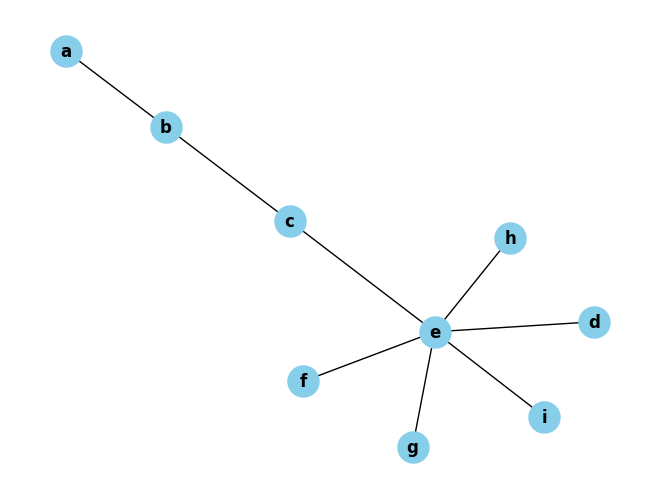

BFS from node a 



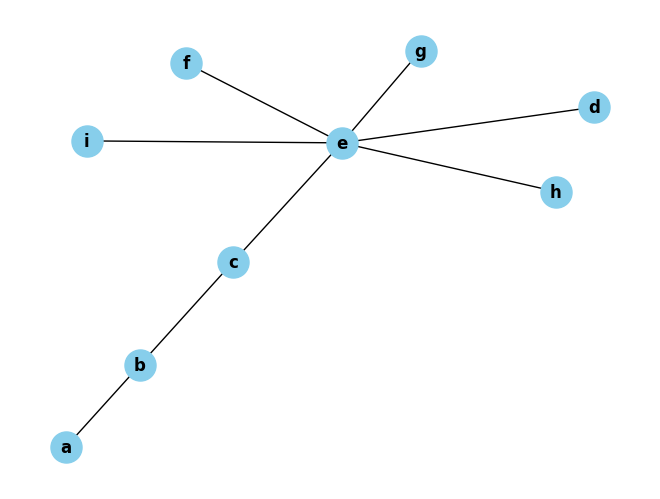

In [398]:
#network
network = NetworkProcessor6()
network.read_file('Network1.txt')
network.get_edges()
network.get_unique_nodes()
network.get_network_array()
network.get_undirected_network_array()
#started node
network.get_BFS_tree('e')
network.get_path_type_transform()
print('BFS from node e \n')
network.get_network_X_plot()
#last added node
network.get_BFS_tree('a')
network.get_path_type_transform()
print('BFS from node a \n')
network.get_network_X_plot()


### Run parallel and series operation

[('s', 'b'), ('b', 's'), ('b', 'c'), ('c', 'b'), ('c', 'e'), ('e', 'c'), ('e', 'd'), ('e', 'f'), ('e', 't'), ('e', 'h'), ('e', 'i')]
[('t', 'b'), ('b', 't'), ('b', 'c'), ('c', 'b'), ('c', 's'), ('s', 'c'), ('s', 'd'), ('s', 'f'), ('s', 'g'), ('s', 'h'), ('s', 'i')]
parallel_operation_BFS


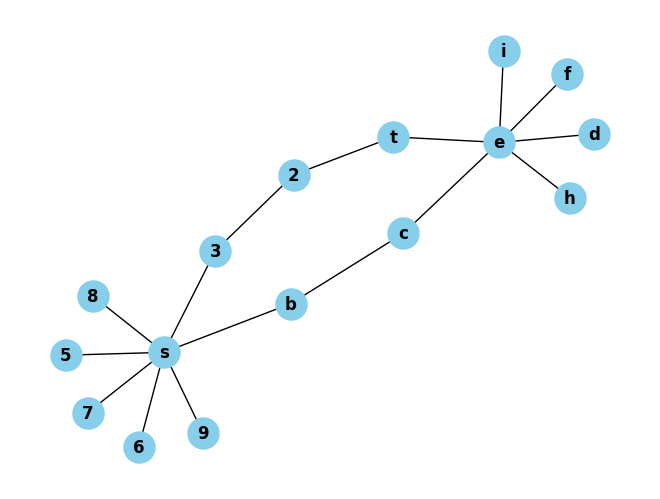

In [399]:
#parallel operation
#tree 1
network.get_BFS_tree('a')
network.get_path_type_transform()
network.find_the_end('a')
network.change_start_end('a')
formatted_paths_modified_BFS_a = network.formatted_paths_BFS_modified
print(formatted_paths_modified_BFS_a)
#tree 2
network.get_BFS_tree('e')
network.get_path_type_transform()
network.find_the_end('e')
network.change_start_end('e')
formatted_paths_modified_BFS_e = network.formatted_paths_BFS_modified #e開始a結束
print(formatted_paths_modified_BFS_e)

#幫tree 2的node改成數字
node_mapping = {'a': '1', 'b': '2', 'c': '3', 'e': '4', 'd': '5', 'f': '6', 'g': '7', 'h': '8', 'i': '9', 's': 's', 't': 't'}
formatted_paths_modified_num_BFS_e = [(node_mapping[node], node_mapping[neighbor]) for node, neighbor in formatted_paths_modified_BFS_e]

#tree1+tree2
parallel_operation_BFS_e_a = formatted_paths_modified_num_BFS_e+formatted_paths_modified_BFS_a #s,t重疊後的圖
unique_elements_BFS = sorted(set(item for sublist in parallel_operation_BFS_e_a for item in sublist))
print('parallel_operation_BFS')
network.formatted_paths = parallel_operation_BFS_e_a
network.nodes = unique_elements_BFS
network.get_network_X_plot()
#network.get_network_X_plot(parallel_operation_BFS_e_a,unique_elements_BFS)

series_operation_BFS


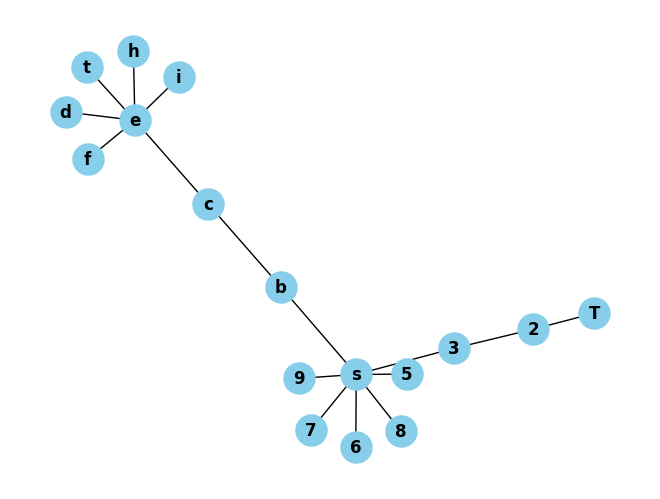

In [400]:
#series_operation_BFS
#tree1,tree2跟前面一樣只是tree2改一個T
#幫tree 2的node改成數字
node_mapping = {'a': '1', 'b': '2', 'c': '3', 'e': '4', 'd': '5', 'f': '6', 'g': '7', 'h': '8', 'i': '9', 's': 's', 't': 'T'} #小T改大T
formatted_paths_modified_num_BFS_e = [(node_mapping[node], node_mapping[neighbor]) for node, neighbor in formatted_paths_modified_BFS_e]

#tree1+tree2
series_operation_BFS_e_a = formatted_paths_modified_num_BFS_e+formatted_paths_modified_BFS_a
unique_elements_BFS = sorted(set(item for sublist in series_operation_BFS_e_a for item in sublist))

print('series_operation_BFS')
network.formatted_paths = series_operation_BFS_e_a
network.nodes = unique_elements_BFS
network.get_network_X_plot()

### Write a program to produce a k-Tree graph
• Input: k, n < k + 5\
• Output: a k-Tree graph

[(1, 2), (2, 3), (1, 3), (3, 4), (2, 4), (1, 4), (3, 5), (3, 5), (2, 5), (4, 6), (3, 6), (3, 6), (4, 7), (4, 7), (3, 7), (4, 8), (4, 8), (4, 8), (5, 9), (4, 9), (4, 9), (5, 10), (5, 10), (4, 10)]


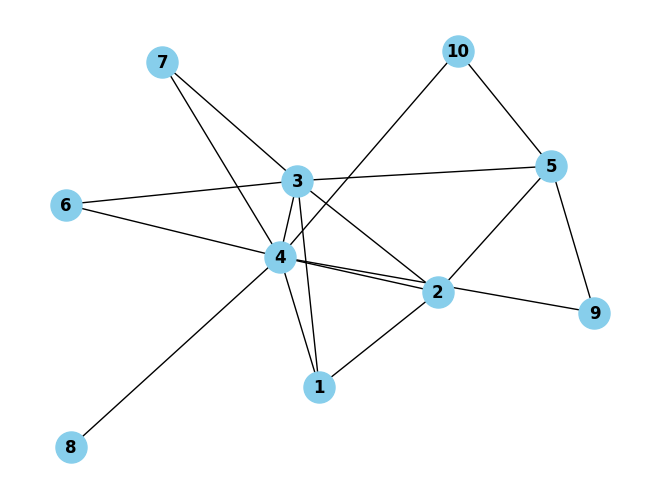

In [401]:
def generate_k_tree(k, n):
  if n < k + 5:
    print("n must be greater than or equal to k + 5")
    return None
  root = 1
  nodes = [root]
  edges = []
  for i in range(2, n + 1):
    branches = min(k, i - 1)
    for j in range(branches):
      child = i
      parent = nodes[i - 2 - j]
      edges.append((parent, child))
      nodes.append(child)
  return edges
# Input values (you can change these)
k_value = 3  # Change this to your desired k value
n_value = 10  # Change this to your desired n value (n < k + 5)
# Generate the k-Tree
edges = generate_k_tree(k_value, n_value)
print(edges)
unique_elements = sorted(set(item for sublist in edges for item in sublist))
network.formatted_paths = edges
network.nodes = unique_elements
network.get_network_X_plot()
